## Problem Statement:
As a child I was facinated by "Big Cats", however, I had a tough time differentiating between certain species. I have taken up a similar problem where the model is trying to predict wheather a big cat is Panthera pardus (Leopard) or Acinonyx jubatus (Cheetah). The model can be used by researchers to label wild specimens of the two species based on images captured in the wild. Since, the model will be identifying the correct species, the team of researchers can delegate the task of capturing images to untrained people and still get a fairly accurate estimate of leopards and cheetahs in any given area. However, since the model is trained using images from internet, for it to generalize to images captured in the wild using mobile devices we have to re-train the model using low-resolution images from mobile devices.

# I have created a vanilla ConvNet and have tried to compare it's performance against a model with pre-trained VGG-19 weights (using transfer learning)

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("Panthera pardus", limit=200,  output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/Panthera pardus


[!!]Indexing page: 1

[%] Indexed 18 Images on Page 1.


[%] Downloading Image #1 from http://parfaitimage.com/Images/Mammalia/Panthera_p_pardus_2007-01-02_06_400.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://parfaitimage.com/Images/Mammalia/Panthera_p_pardus_2007-01-02_02.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.pbs.org/wnet/nature/files/2010/11/2805-facts-mez.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://ak7.picdn.net/shutterstock/videos/1018816777/thumb/12.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.robertharding.com/watermark.php?type=preview&amp;im=RM/RH/VERTICAL/743-139
[%] File Downloaded !

[%] Downloading Image #6 from https://animaldiversity.org/collections/contributors/kay_holekamp/Leopards6ingrass4_98/medium.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://cdn.thinglink.me/api/image/636911437515587586/1024/10/sca

In [ ]:
downloader.download("Acinonyx jubatus", limit=200,  output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/Acinonyx jubatus


[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from https://c2.staticflickr.com/6/5189/5647180480_8dde5ea1d3_b.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.biofaces.com/img/c/1200/630/post/2014/01/1389638088.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://lifecatalog.ru/images/a/aci/Acinonyx-jubatus--10.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://kimcampion.com/wp-content/uploads/2015/06/asiatic-cheetah.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://animaldiversity.org/collections/contributors/barbara_lundrigan/pcd3911_13/medium.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://vignette3.wikia.nocookie.net/zt2downloadlibrary/images/a/ad/Magyarosaurus_(oO-VND-Oo).png/revision/latest?cb=20150728154658
[%] File Downloaded !

[%] Downloading Image #7 from https://www.ogrodyzoologiczne.pl/galerie/gepard/z

## Creating directory structure for storing images

In [ ]:
!mkdir train
!mkdir validation
!mkdir test

In [ ]:
import os.path
from os import path

os.mkdir('/content/train/cheetah/')
os.mkdir('/content/validation/cheetah/')
os.mkdir('/content/test/cheetah/')

os.mkdir('/content/train/leopard/')
os.mkdir('/content/validation/leopard/')
os.mkdir('/content/test/leopard/')

Coping images to correct partition.

In [ ]:
import shutil
fnames = ['Image_{}.jpg'.format(i) for i in range(1,150)]
for fname in fnames:
    src = '/content/images/Acinonyx jubatus/'+ fname
    dst = '/content/train/cheetah/'+ fname
    if path.exists(src) == True:
      shutil.copyfile(src, dst)

fnames = ['Image_{}.jpg'.format(i) for i in range(150,175)]
for fname in fnames:
    src = '/content/images/Acinonyx jubatus/'+ fname
    dst = '/content/validation/cheetah/'+ fname
    if path.exists(src) == True:
      shutil.copyfile(src, dst)

fnames = ['Image_{}.jpg'.format(i) for i in range(175,200)]
for fname in fnames:
    src = '/content/images/Acinonyx jubatus/'+ fname
    dst = '/content/test/cheetah/'+ fname
    if path.exists(src) == True:
      shutil.copyfile(src, dst)

In [ ]:
fnames = ['Image_{}.jpg'.format(i) for i in range(1,150)]
for fname in fnames:
    src = '/content/images/Panthera pardus/'+ fname
    dst = '/content/train/leopard/'+ fname
    if path.exists(src) == True:
      shutil.copyfile(src, dst)

fnames = ['Image_{}.jpg'.format(i) for i in range(150,175)]
for fname in fnames:
    src = '/content/images/Panthera pardus/'+ fname
    dst = '/content/validation/leopard/'+ fname
    if path.exists(src) == True:
      shutil.copyfile(src, dst)

fnames = ['Image_{}.jpg'.format(i) for i in range(175,200)]
for fname in fnames:
    src = '/content/images/Panthera pardus/'+ fname
    dst = '/content/test/leopard/'+ fname
    if path.exists(src) == True:
      shutil.copyfile(src, dst)

In [ ]:
!ls images/ -alrt

total 32
drwxr-xr-x 2 root root 12288 Oct 12 03:44 'Panthera pardus'
drwxr-xr-x 4 root root  4096 Oct 12 03:44  .
drwxr-xr-x 2 root root 12288 Oct 12 03:47 'Acinonyx jubatus'
drwxr-xr-x 1 root root  4096 Oct 12 03:47  ..


In [ ]:
!ls 'images'/'Acinonyx jubatus'

Image_100.jpg  Image_137.jpg  Image_173.jpg  Image_28.jpg  Image_64.jpg
Image_101.jpg  Image_138.jpg  Image_174.jpg  Image_29.jpg  Image_65.jpg
Image_102.jpg  Image_139.jpg  Image_175.jpg  Image_2.jpg   Image_66.jpg
Image_103.jpg  Image_13.jpg   Image_176.jpg  Image_30.jpg  Image_67.jpg
Image_104.jpg  Image_140.jpg  Image_177.jpg  Image_31.jpg  Image_68.jpg
Image_105.jpg  Image_141.jpg  Image_178.jpg  Image_32.jpg  Image_69.jpg
Image_106.jpg  Image_142.jpg  Image_179.jpg  Image_33.jpg  Image_6.jpg
Image_107.jpg  Image_143.jpg  Image_17.jpg   Image_34.jpg  Image_70.jpg
Image_108.jpg  Image_144.jpg  Image_180.jpg  Image_35.jpg  Image_71.jpg
Image_109.jpg  Image_145.jpg  Image_181.jpg  Image_36.jpg  Image_72.jpg
Image_10.jpg   Image_146.jpg  Image_182.jpg  Image_37.jpg  Image_73.jpg
Image_110.jpg  Image_147.jpg  Image_183.jpg  Image_38.jpg  Image_74.jpg
Image_111.JPG  Image_148.jpg  Image_184.jpg  Image_39.jpg  Image_75.jpg
Image_112.jpg  Image_149.jpg  Image_185.jpg  Image_3.jpg   Image_

In [ ]:
!ls 'images'/'Panthera pardus'

Image_100.jpg	Image_137.jpg	Image_173.jpg  Image_28.jpg   Image_64.jpg
Image_101.jpg	Image_138.jpg	Image_174.jpg  Image_29.jpg   Image_65.JPG
Image_102.JPG	Image_139.jpg	Image_175.jpg  Image_2.jpg    Image_66.jpg
Image_103.JPG	Image_13.jpg	Image_176.jpg  Image_30.jpeg  Image_67.jpg
Image_104.jpg	Image_140.jpg	Image_177.jpg  Image_31.jpg   Image_68.jpg
Image_105.jpg	Image_141.jpg	Image_178.jpg  Image_32.png   Image_69.jpg
Image_106.jpg	Image_142.jpeg	Image_179.jpg  Image_33.jpg   Image_6.jpg
Image_107.jpg	Image_143.jpg	Image_17.jpg   Image_34.jpg   Image_70.JPG
Image_108.jpg	Image_144.jpg	Image_180.jpg  Image_35.jpg   Image_71.jpg
Image_109.jpg	Image_145.jpg	Image_181.jpg  Image_36.jpg   Image_72.jpeg
Image_10.jpg	Image_146.jpg	Image_182.jpg  Image_37.jpg   Image_73.jpg
Image_110.jpg	Image_147.jpg	Image_183.jpg  Image_38.jpg   Image_74.jpg
Image_111.jpg	Image_148.jpg	Image_184.jpg  Image_39.jpg   Image_75.jpg
Image_112.jpg	Image_149.jpg	Image_185.jpg  Image_3.jpg    Image_76.jpg
Image_1

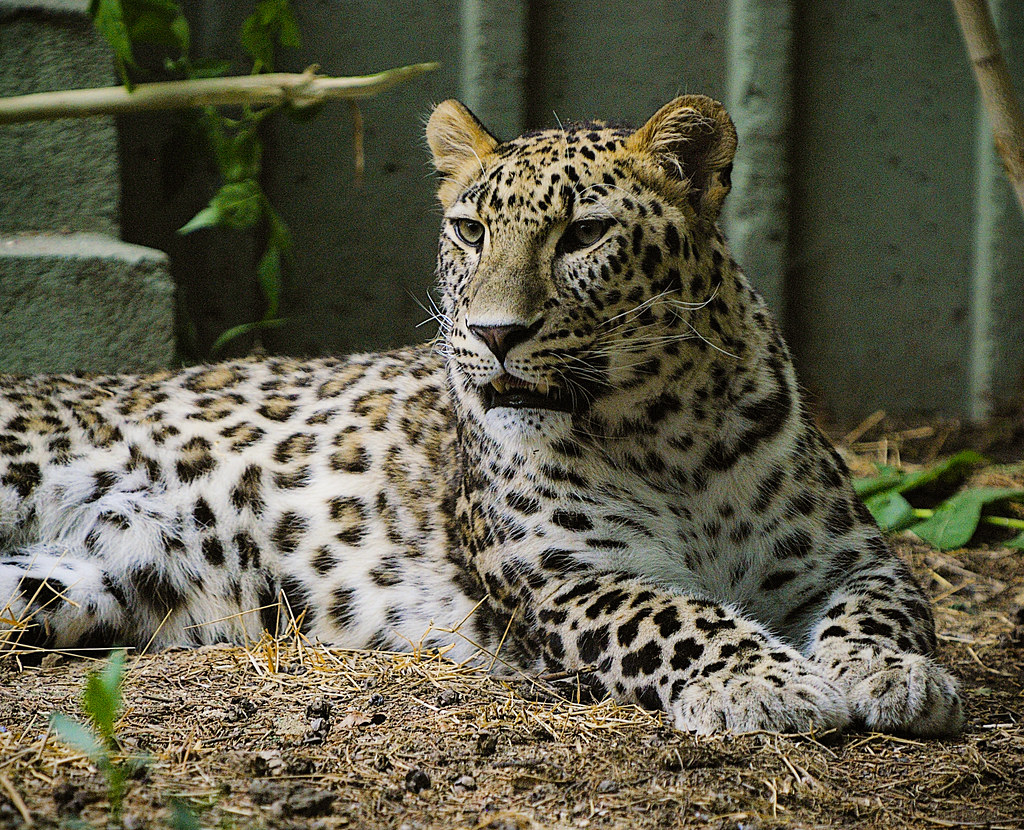

In [ ]:
from IPython.display import Image
Image("images/Panthera pardus/Image_120.jpg")

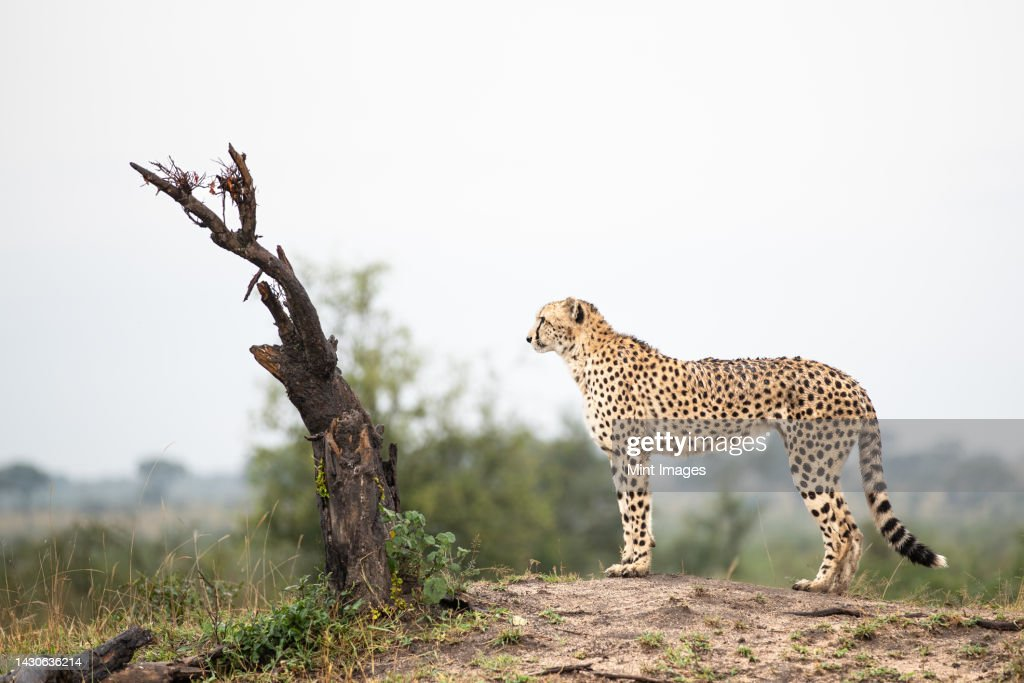

In [ ]:
Image("images/Acinonyx jubatus/Image_156.jpg")

In [ ]:
from PIL import Image
im=Image.open("images/Acinonyx jubatus/Image_50.jpg")
im.size

(1920, 1080)

In [ ]:
train_dir = '/content/train/'
validation_dir = '/content/validation/'
test_dir = '/content/test/'

## Defining the image data generator for train, validatation and test sets

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 256*256
        target_size=(256, 256),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(256, 256),
        batch_size=10,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=10,
        class_mode='binary')

Found 279 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [ ]:
# early stopping callback
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=20, 
                   restore_best_weights = True)

## Defining vanila ConvNet for binary classification task

In [ ]:
from keras import layers
from keras import models
from keras.layers import Dense, Dropout

model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu',
                        input_shape=(256, 256, 3))) # this needs to match with our data prep - upcoming!
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 256)     7168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 256)    0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 128)     295040    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 256)     

In [ ]:
from keras import optimizers
import tensorflow as tf
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
import time

start = time.time()
print("hello")

history = model.fit(
      train_generator,
      steps_per_epoch=28, # ideally...len(trainX) // BS == 300/10  == 30
      epochs=1000,
      callbacks=[es],
      validation_data=validation_generator,
      validation_steps=4)  # ideally...len(valX) // BS == 50/10 == 5
                            # Total number of steps (batches of samples) to validate before stopping.

end = time.time()
print(end - start)

hello
Epoch 1/1000
28/28 [==============================] - 247s 9s/step - loss: 0.6933 - acc: 0.4875 - val_loss: 0.6916 - val_acc: 0.5250
Epoch 2/1000
28/28 [==============================] - 240s 9s/step - loss: 0.6918 - acc: 0.5125 - val_loss: 0.6896 - val_acc: 0.5000
Epoch 3/1000
28/28 [==============================] - 242s 9s/step - loss: 0.6914 - acc: 0.5305 - val_loss: 0.6865 - val_acc: 0.7250
Epoch 4/1000
28/28 [==============================] - 241s 9s/step - loss: 0.6885 - acc: 0.5771 - val_loss: 0.6847 - val_acc: 0.5250
Epoch 5/1000
28/28 [==============================] - 281s 10s/step - loss: 0.6870 - acc: 0.5950 - val_loss: 0.6746 - val_acc: 0.6750
Epoch 6/1000
28/28 [==============================] - 271s 10s/step - loss: 0.6873 - acc: 0.5699 - val_loss: 0.6723 - val_acc: 0.7000
Epoch 7/1000
28/28 [==============================] - 283s 10s/step - loss: 0.6818 - acc: 0.6201 - val_loss: 0.6607 - val_acc: 0.7750
Epoch 8/1000
28/28 [==============================] - 276s 1

## Visualizing the results for vanilla ConvNet

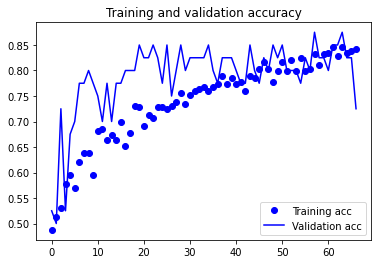

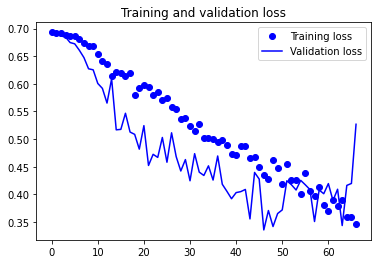

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
import pandas as pd
my_results = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in validation_generator:
  batches=batches+1
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = my_results.append(tmp)
  if batches >= 5:  # hard-coded the 1000 and 31 - you can improve it! it's the number of images and steps_per_epoch
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

my_results_test = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in test_generator:
  batches=batches+1
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results_test = my_results_test.append(tmp)
  if batches >= 5:  # hard-coded the 1000 and 31 - you can improve it! it's the number of images and steps_per_epoch
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

print(classification_report(y_true=my_results_test['actual'],
                            y_pred=np.round(my_results_test['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        24
         1.0       0.78      0.84      0.81        25

    accuracy                           0.80        49
   macro avg       0.80      0.79      0.80        49
weighted avg       0.80      0.80      0.80        49

              precision    recall  f1-score   support

         0.0       0.70      0.92      0.79        25
         1.0       0.88      0.58      0.70        24

    accuracy                           0.76        49
   macro avg       0.79      0.75      0.75        49
weighted avg       0.78      0.76      0.75        49



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results_test['pred'],0)))

[[18  6]
 [ 4 21]]
[[15  9]
 [18  7]]


## Transfer Learning
To compare the previous model to an industry standard model, I am using transfer learning from VGG-19 network. I have saved the intermediate predictions from VGG-19 and used them in a deep net with 4 hidden layers and sigmoid activation function.

In [ ]:
import tensorflow as tf

In [ ]:
conv_base = tf.keras.applications.vgg19.VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3)
)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# warning - will take time to run this!
# let's time it
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from datetime import datetime
startTime = datetime.now()

# initialize your generator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8, 8, 512)) # this is given from the VGG16 architecture!
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        if features_batch.shape[0] < 10:
          continue
        else:
          features[i * batch_size : (i + 1) * batch_size] = features_batch
          labels[i * batch_size : (i + 1) * batch_size] = labels_batch
          i += 1
          if i * batch_size >= sample_count:
              # Note that since generators yield data indefinitely in a loop,
              # we must `break` after every image has been seen once.
              break
    return features, labels

train_features, train_labels = extract_features(train_dir, 270) # 2010?
print(datetime.now() - startTime)
validation_features, validation_labels = extract_features(validation_dir, 40)
print(datetime.now() - startTime)
test_features, test_labels = extract_features(test_dir, 40)
print(datetime.now() - startTime)

Found 279 images belonging to 2 classes.
0:03:31.447579
Found 49 images belonging to 2 classes.
0:04:02.153131
Found 49 images belonging to 2 classes.
0:04:32.954680


In [ ]:
#these are the X features for modeling
train_features = np.reshape(train_features, (270, 8 * 8 * 512))
validation_features = np.reshape(validation_features, (40, 8 * 8 * 512))
test_features = np.reshape(test_features, (40, 8 * 8 * 512))

For the fully connected layers, I am using the same architecture as the vanilla ConvNet model. I wish to observe the gain in performance that VGG-19 can provide for my classification task

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=8 * 8 * 512))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=20, 
                   restore_best_weights = True)

history = model.fit(tf.expand_dims(train_features, axis=-1)
      , train_labels,
      steps_per_epoch=27, # ideally...len(trainX) // BS == 300/10  == 30
      epochs=1000,
      callbacks=[es],
      validation_data=(validation_features, validation_labels),
      validation_steps=4)

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


27/27 [==============================] - 9s 291ms/step - loss: 0.7373 - acc: 0.5222 - val_loss: 0.6436 - val_acc: 0.6000
Epoch 2/1000
27/27 [==============================] - 8s 283ms/step - loss: 0.6355 - acc: 0.6556 - val_loss: 0.6241 - val_acc: 0.6250
Epoch 3/1000
27/27 [==============================] - 8s 284ms/step - loss: 0.5937 - acc: 0.6630 - val_loss: 0.6324 - val_acc: 0.6250
Epoch 4/1000
27/27 [==============================] - 8s 285ms/step - loss: 0.5272 - acc: 0.7593 - val_loss: 0.6555 - val_acc: 0.6250
Epoch 5/1000
27/27 [==============================] - 8s 286ms/step - loss: 0.4816 - acc: 0.7630 - val_loss: 0.6144 - val_acc: 0.6500
Epoch 6/1000
27/27 [==============================] - 8s 288ms/step - loss: 0.4562 - acc: 0.7704 - val_loss: 0.5991 - val_acc: 0.6250
Epoch 7/1000
27/27 [==============================] - 8s 283ms/step - loss: 0.3484 - acc: 0.8481 - val_loss: 0.4495 - val_acc: 0.7500
Epoch 8/1000
27/27 [==============================] - 8s 286ms/step - loss:

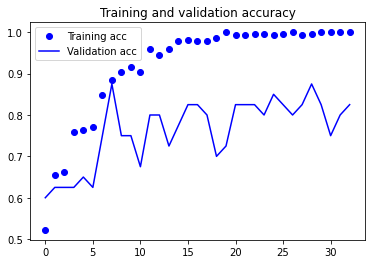

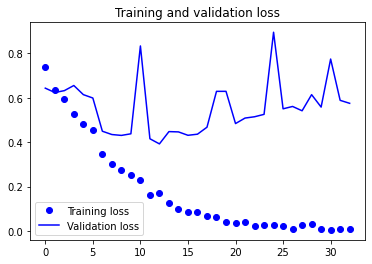

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
my_results = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in zip(validation_features, validation_labels):
  batches=batches+1
  x_val = x_val.reshape(-1, 8* 8* 512)
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results = my_results.append(tmp)
  if batches >= 50:  # hard-coded the 1000 and 31 - you can improve it! it's the number of images and steps_per_epoch
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

my_results_test = pd.DataFrame(columns={'actual','pred'})
batches = 0
for x_val, y_val in zip(test_features, test_labels):
  batches=batches+1
  x_val = x_val.reshape(-1, 8* 8* 512)
  y_pred = model.predict(x_val)
  y_pred = flatten(y_pred)
  tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  my_results_test = my_results_test.append(tmp)
  if batches >= 50:  # hard-coded the 1000 and 31 - you can improve it! it's the number of images and steps_per_epoch
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

print(classification_report(y_true=my_results_test['actual'],
                            y_pred=np.round(my_results_test['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        17
         1.0       0.83      0.83      0.83        23

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81        22
         1.0       0.75      0.83      0.79        18

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results_test['pred'],0)))

[[13  4]
 [ 4 19]]
[[10  7]
 [10 13]]
